In [136]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})
import pandas as pd

In [126]:
df = pd.read_csv("accl1.csv")

In [127]:
df = df[0:1000].copy()
df.shape

(1000, 17)

In [128]:
s=df.to_numpy()
t,ax_L,ay_L,az_L,amag_L,vx_L,vy_L,vz_L,vmag_L,ax_R,ay_R,az_R,amag_R,vx_R,vy_R,vz_R,vmag_R=s.T
print(t[10],amag_L[10],amag_R[10])

0.125 9.770507087999999 9.840594842


# Acceleration

Text(0.5, 1.0, 'Right')

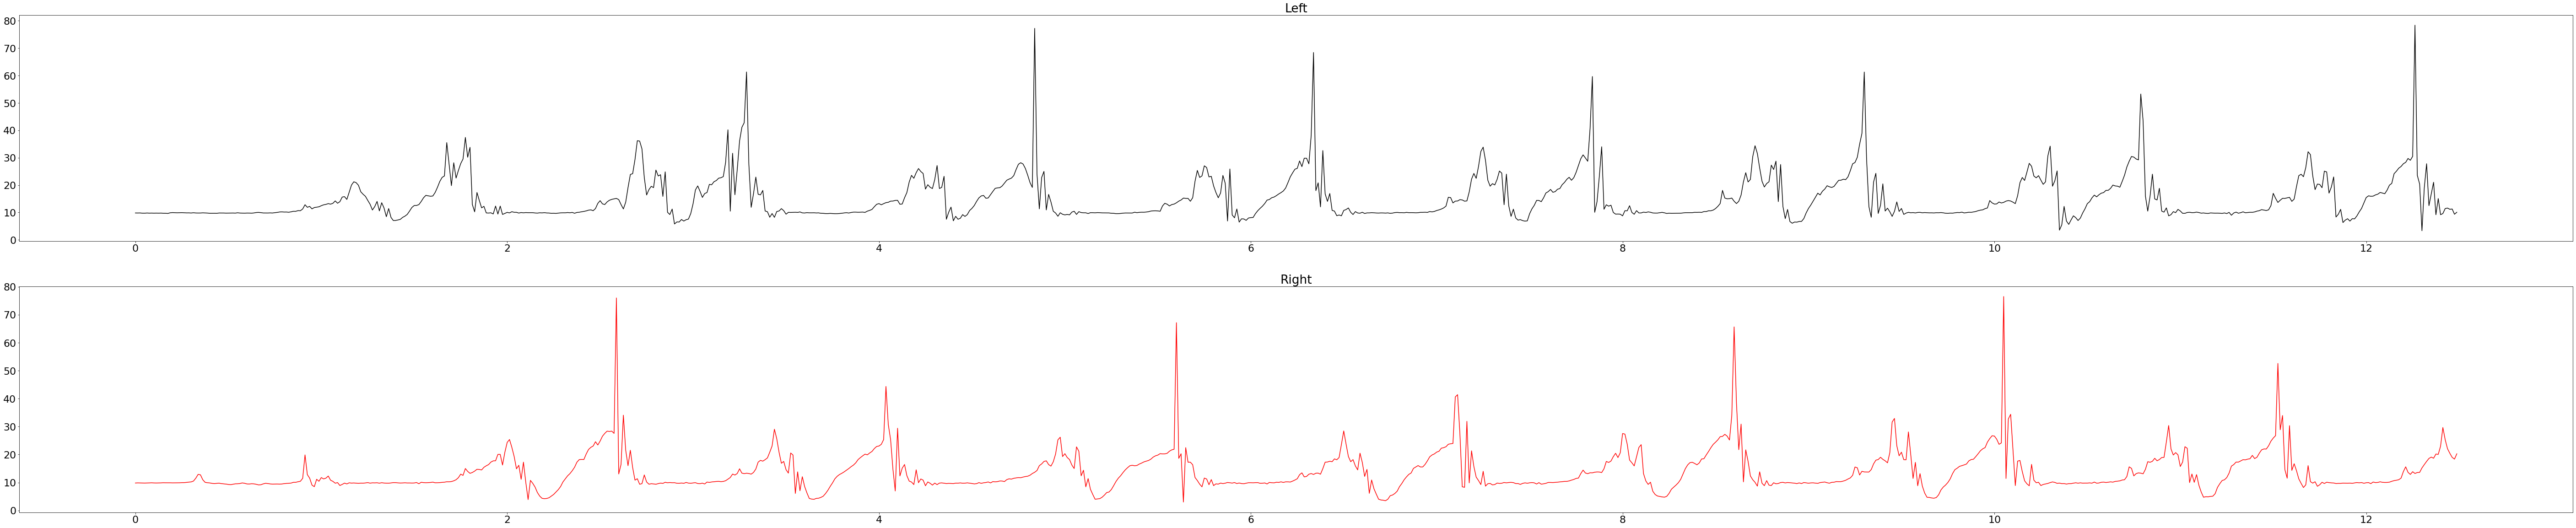

In [129]:
figure, axis = plt.subplots(2,1,figsize=(100, 20))
#plt.plot(t,ax,label="ax")
#plt.plot(t,ay,label="ay")
#plt.plot(t,az,label="az")
axis[0].plot(t,amag_L,label='amag_L',color='black')  #acceleration of left leg
axis[1].plot(t,amag_R,label='amag_R',color='red')    #acceleration of Right leg
#figure.supxlabel('time[s]')
#figure.supxlabel('acc[m/s^2]')

axis[0].set_title('Left')
axis[1].set_title('Right')


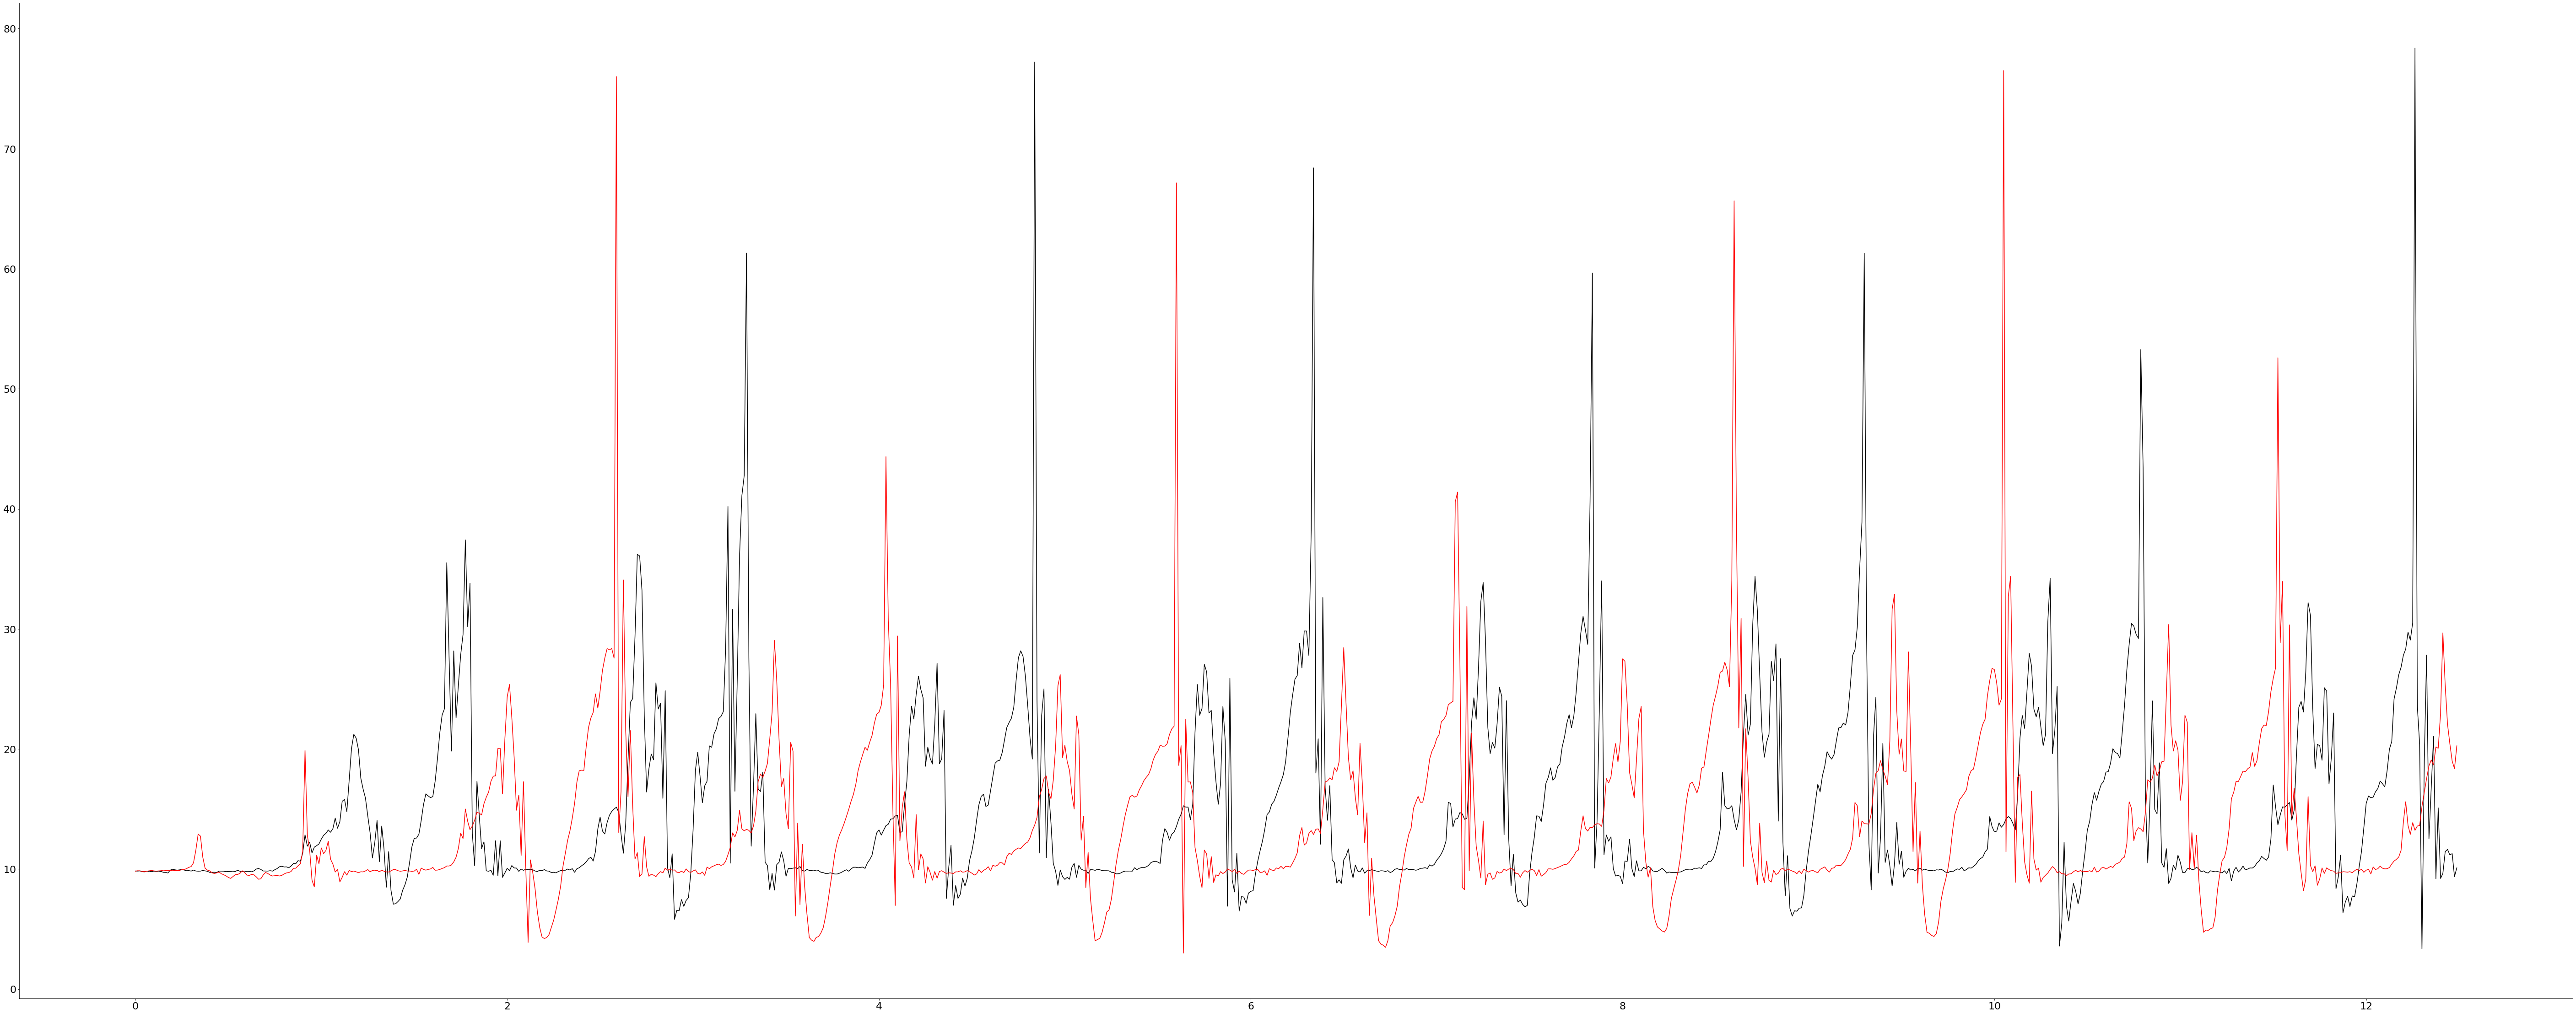

In [130]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,amag_L,label='amag_L',color='black')
plt.plot(t,amag_R,label='amag_R',color='Red')

In [131]:
df.columns

Index(['Time', 'Acc_XL', 'Acc_YL', 'Acc_ZL', 'Abs_left', 'VelInc_XL',
       'VelInc_YL', 'VelInc_ZL', 'Velmag_L', 'Acc_XR', 'Acc_YR', 'Acc_ZR',
       'Abs_Right', 'VelInc_XR', 'VelInc_YR', 'VelInc_ZR', 'Velmag_R'],
      dtype='object')

In [132]:
amagstd_L=df['Abs_left'].std()
amagmean_L=df['Abs_left'].mean()
amagstd_R=df['Abs_Right'].std()
amagmean_R=df['Abs_Right'].mean()
print("STD-Left=",amagstd_L)
print("STD-Right=",amagstd_R)
print("Mean-Left=",amagmean_L)
print("Mean-Right=",amagmean_R)

STD-Left= 7.991359250513859
STD-Right= 7.026535400404117
Mean-Left= 14.979513482573996
Mean-Right= 13.671983052352006


In [133]:
range(0,len(df['Abs_left']))

range(0, 1000)

In [134]:
Left_peaks_acc=[]
y_L=[]
for i in range(1,len(df['Abs_left'])):
    if(df['Abs_left'][i]>=(amagmean_L+3*amagstd_L)):
        if(df['Abs_left'][i]>df['Abs_left'][i+1]) and (df['Abs_left'][i]>df['Abs_left'][i-1]):
            Left_peaks_acc.append(df['Time'][i])
            y_L.append(i)
    

y_R=[]            
Right_peaks_acc=[]
for i in range(1,len(df['Abs_Right'])):
    if(df['Abs_Right'][i]>=(amagmean_R+3*amagstd_R)):
        if(df['Abs_Right'][i]>df['Abs_Right'][i+1]) and (df['Abs_Right'][i]>df['Abs_Right'][i-1]):
            Right_peaks_acc.append(df['Time'][i])
            y_R.append(i)

Text(0.5, 1.0, 'Acc vs Time')

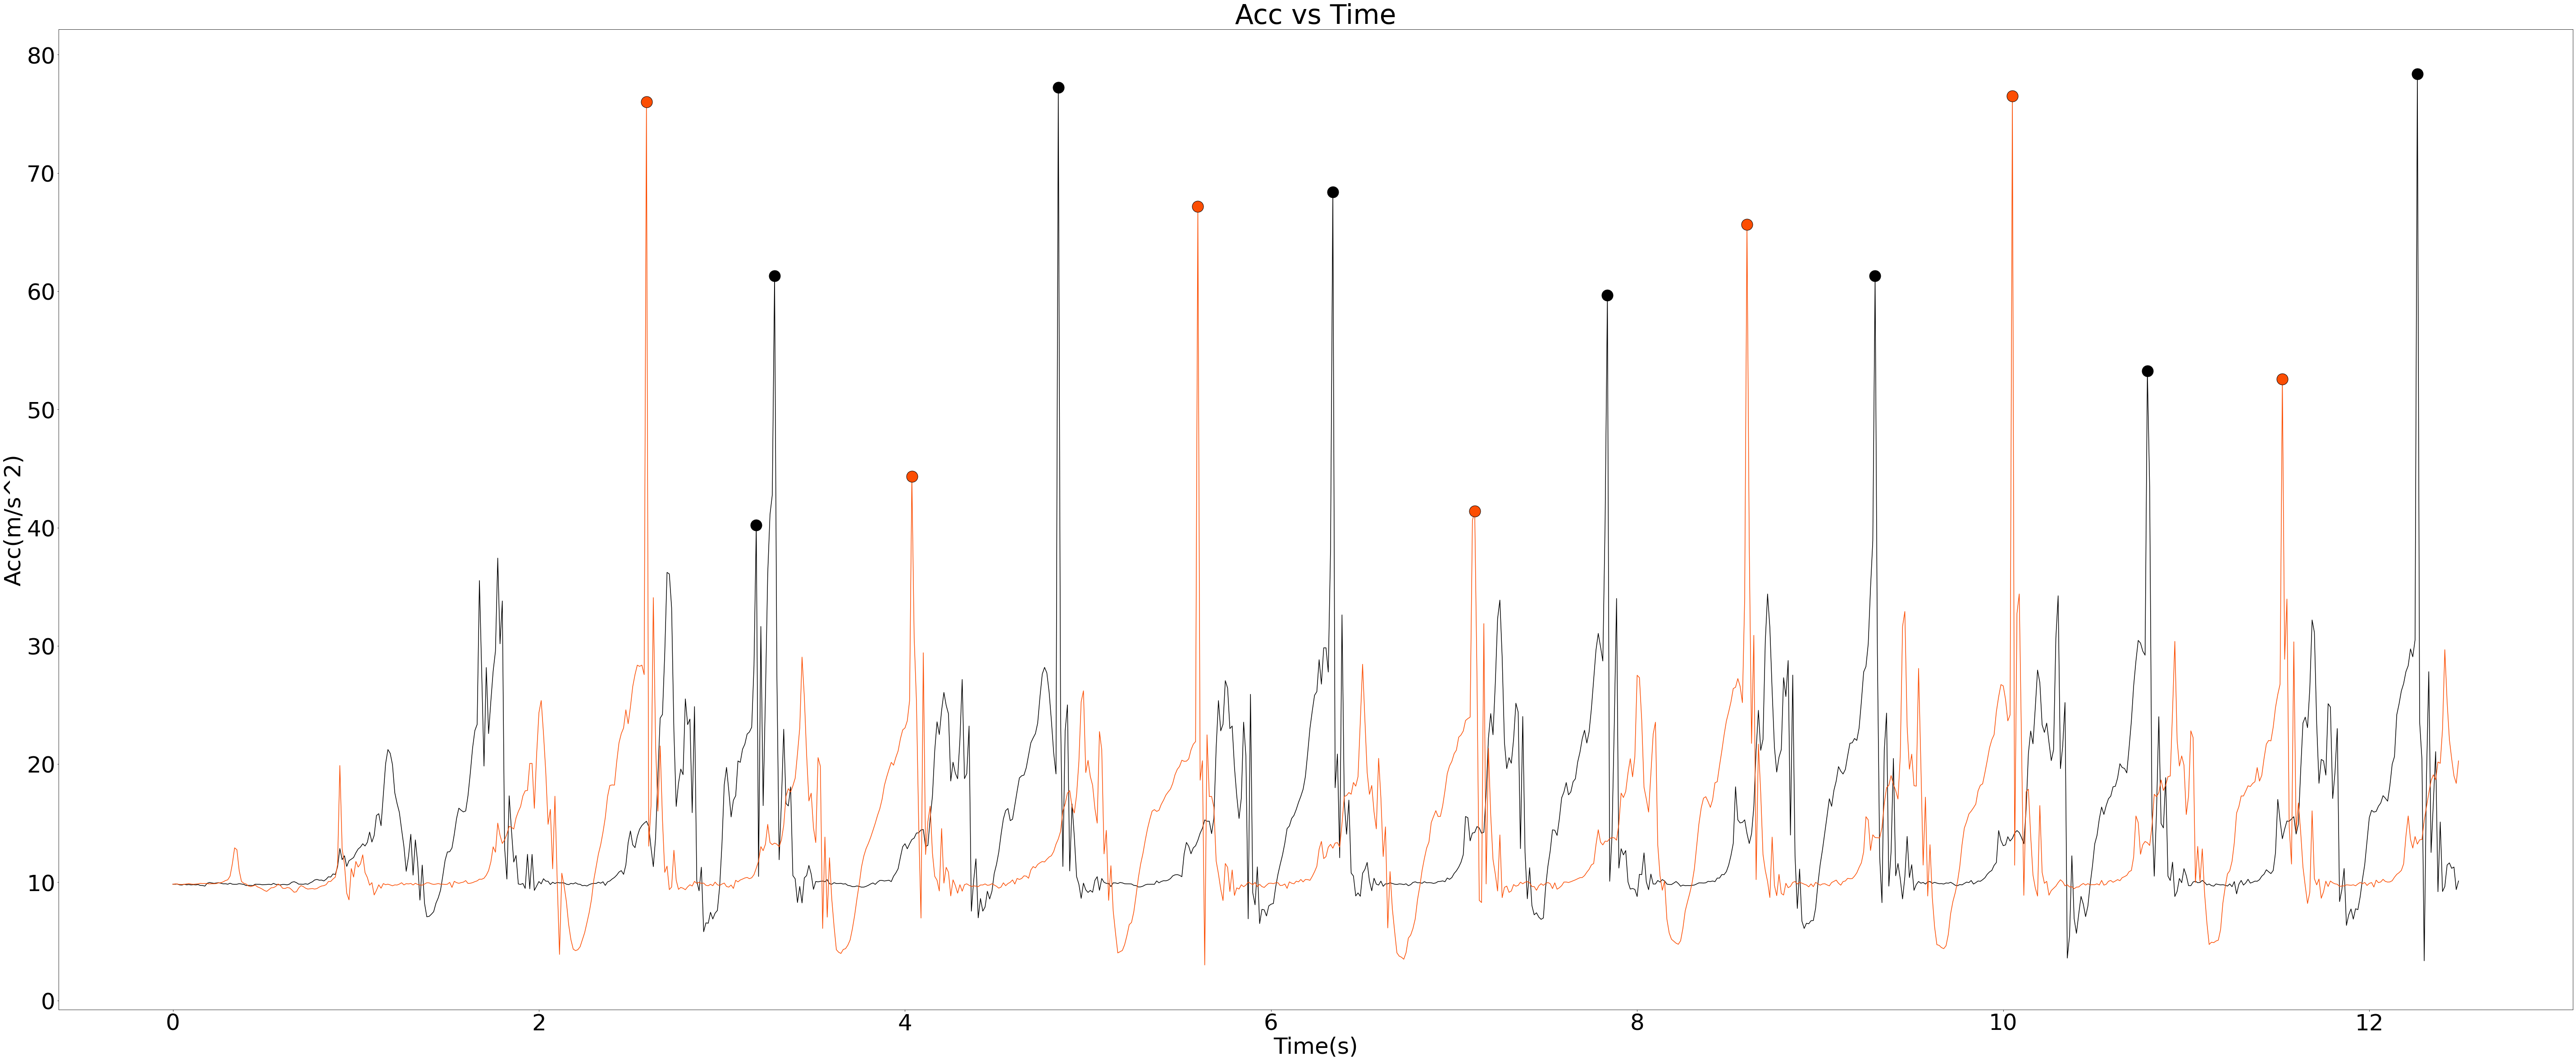

In [138]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,amag_L,label='amag_L',color='black')
plt.plot(t,amag_R,label='amag_R',color='#fc4e03')
plt.plot(Left_peaks_acc,[amag_L[i] for i in y_L], ls="", marker="o",markerfacecolor='black',markersize=25,markeredgecolor='black', label="points")
plt.plot(Right_peaks_acc,[amag_R[i] for i in y_R], ls="", marker="o",markerfacecolor='#fc4e03',markersize=25,markeredgecolor='black', label="points")
plt.xlabel("Time(s)")
plt.ylabel("Acc(m/s^2)")
plt.title("Acc vs Time")

# Velocity

Text(0.5, 1.0, 'Right')

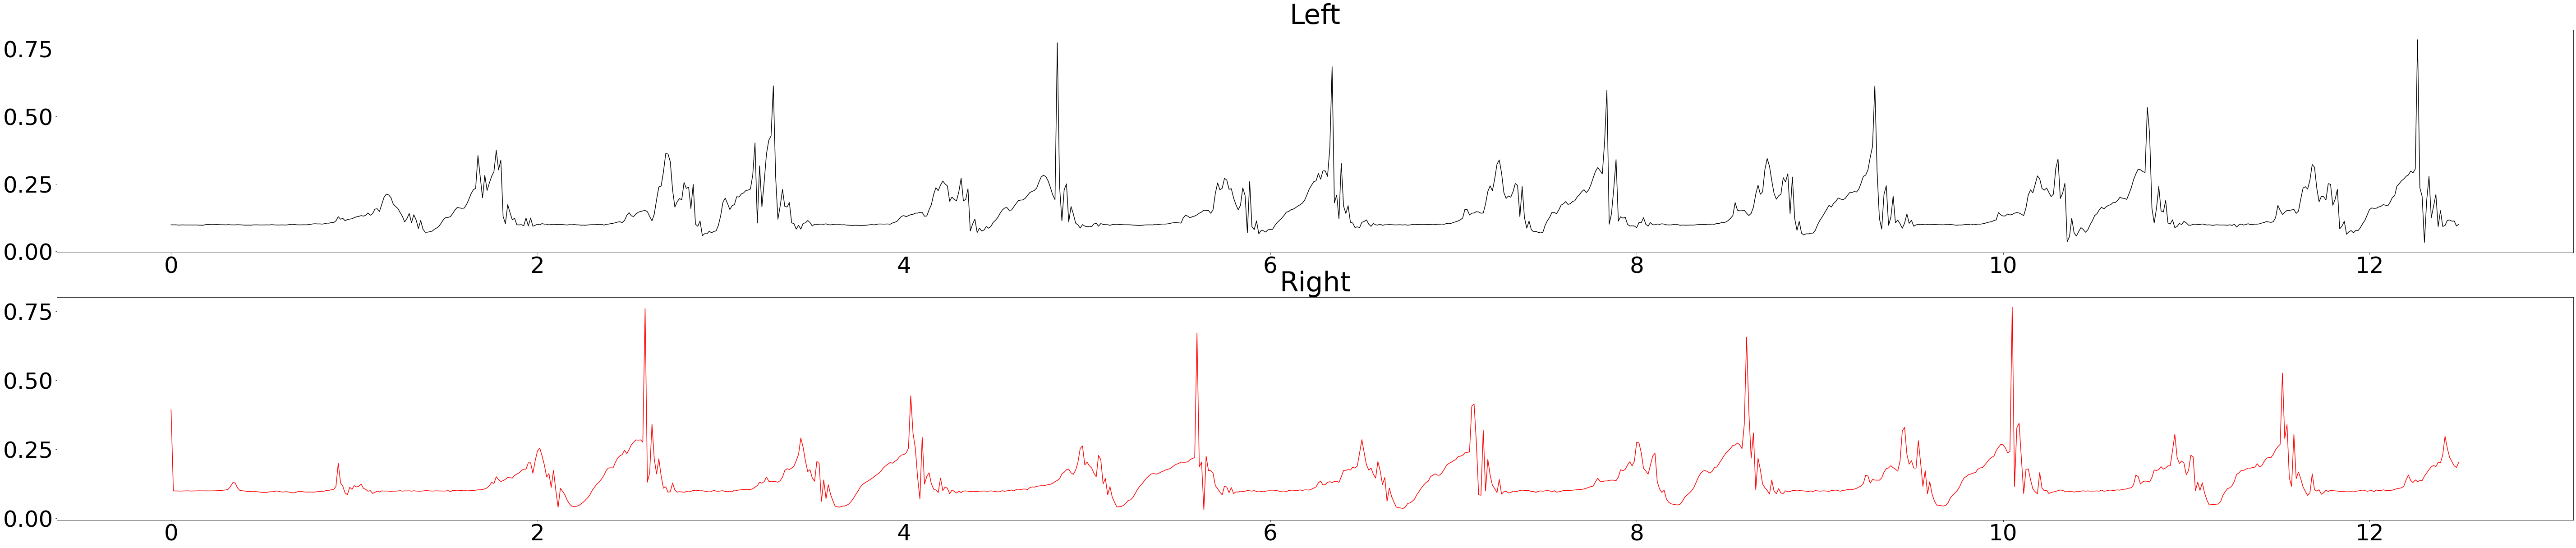

In [139]:
#Velocity
figure, axis = plt.subplots(2,1,figsize=(100, 20))
axis[0].plot(t,vmag_L,label='velocity_L',color='black')
axis[1].plot(t,vmag_R,label='velocity_R',color='red')
axis[0].set_title('Left')
axis[1].set_title('Right')

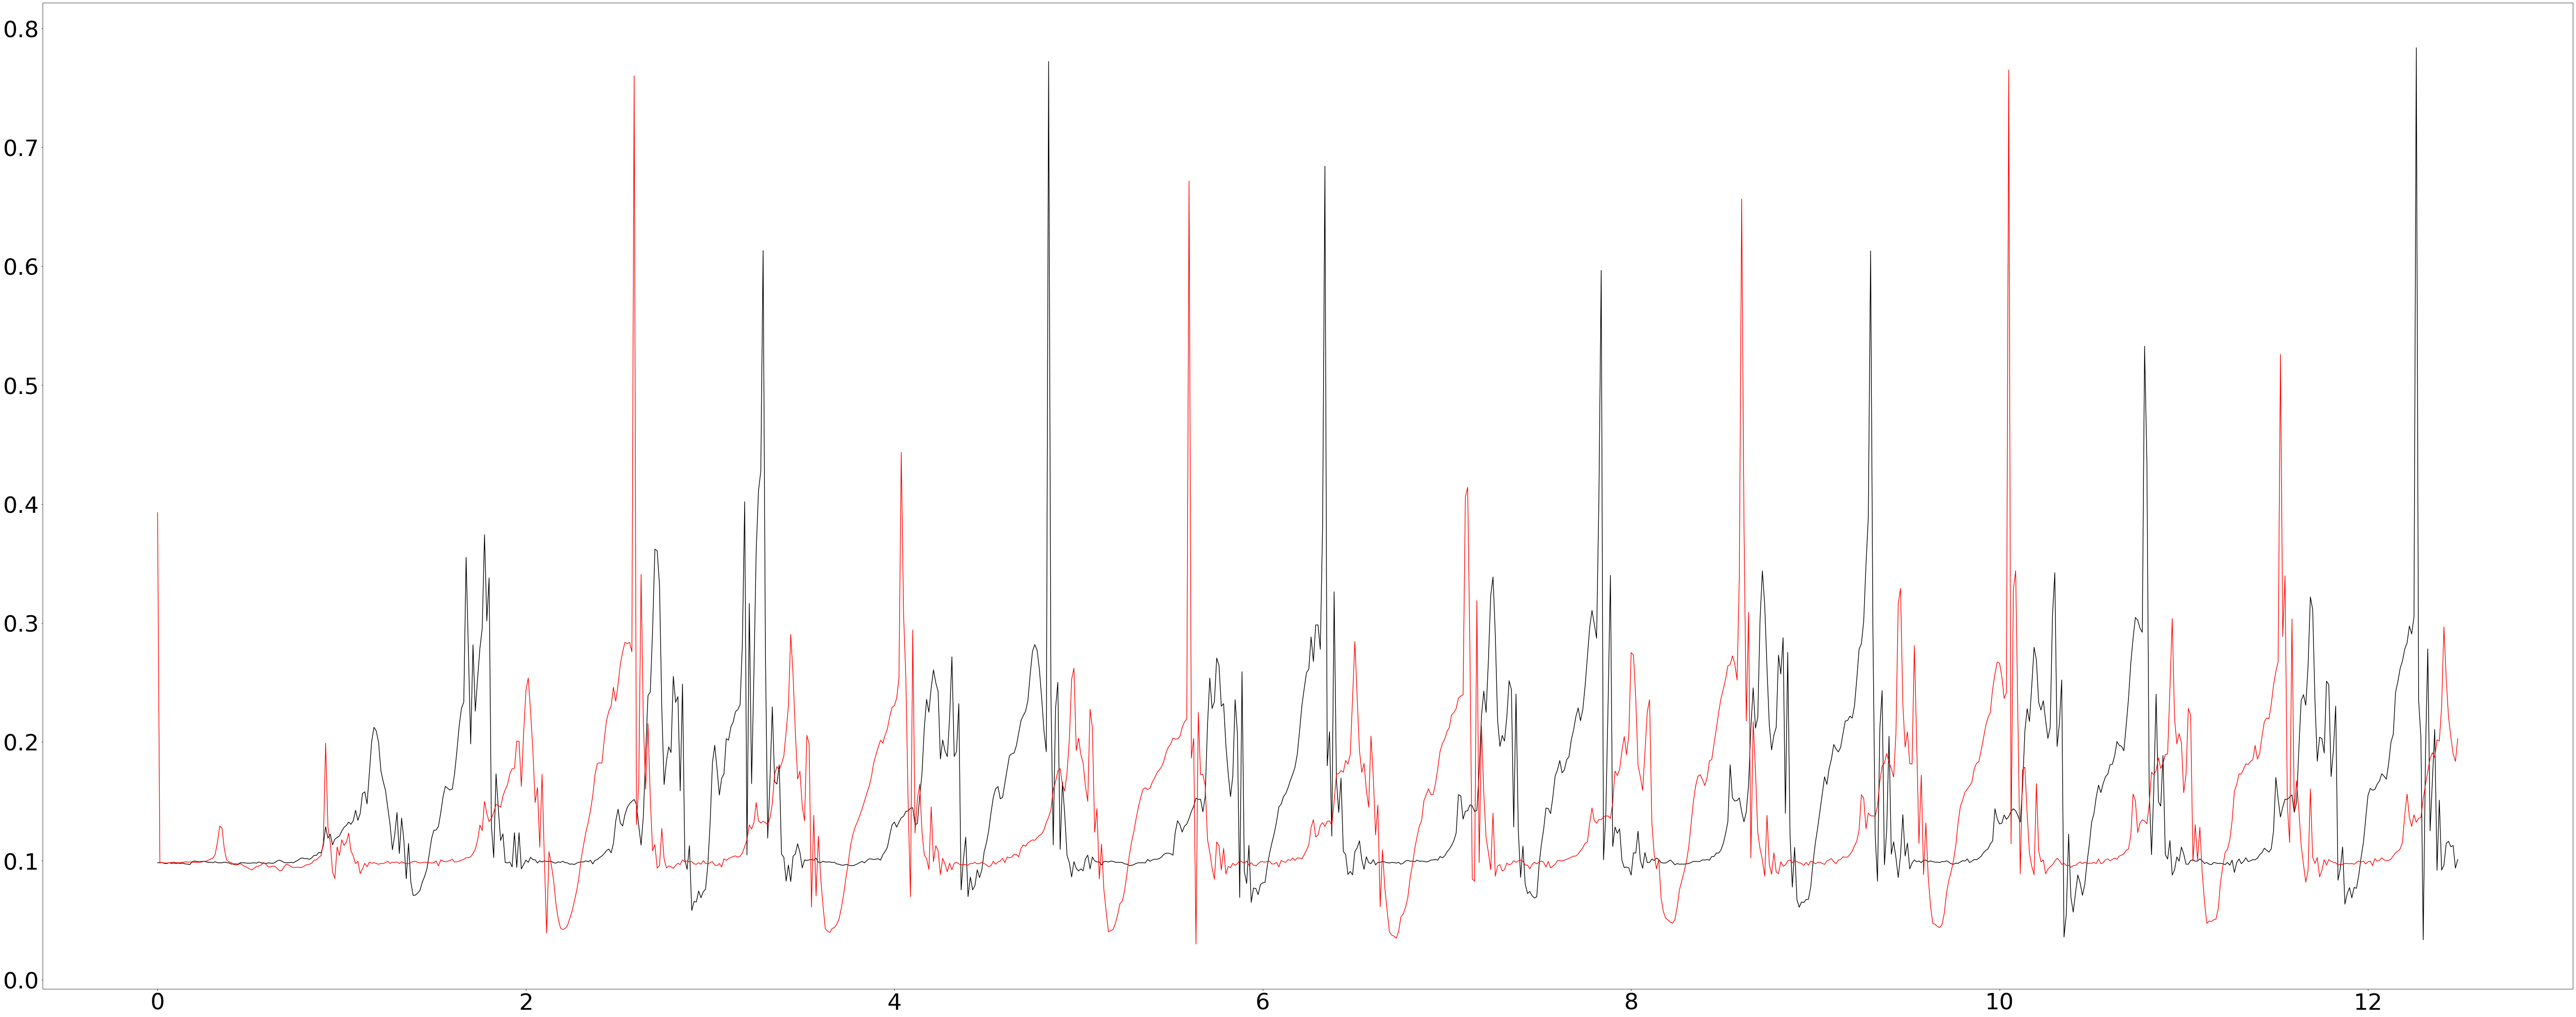

In [140]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,vmag_L,label='vel_L',color='black')
plt.plot(t,vmag_R,label='vel_R',color='Red')

In [141]:
vmagstd_L=df['Velmag_L'].std()
vmagmean_L=df['Velmag_L'].mean()
vmagstd_R=df['Velmag_R'].std()
vmagmean_R=df['Velmag_R'].mean()
print("STD-Left=",vmagstd_L)
print("STD-Right=",vmagstd_R)
print("Mean-Left=",vmagmean_L)
print("Mean-Right=",vmagmean_R)

STD-Left= 0.07990639261035767
STD-Right= 0.07071411261948068
Mean-Left= 0.14978552218799993
Mean-Right= 0.1370074024350002


In [142]:
Left_peaks_vel=[]
y_L=[]
for i in range(1,len(df['Velmag_L'])):
    if(df['Velmag_L'][i]>=(vmagmean_L+3*vmagstd_L)):
        if(df['Velmag_L'][i]>df['Velmag_L'][i+1]) and (df['Velmag_L'][i]>df['Velmag_L'][i-1]):
            Left_peaks_vel.append(df['Time'][i])
            y_L.append(i)
    

y_R=[]            
Right_peaks_vel=[]
for i in range(1,len(df['Velmag_R'])):
    if(df['Velmag_R'][i]>=(vmagmean_R+3*vmagstd_R)):
        if(df['Velmag_R'][i]>df['Velmag_R'][i+1]) and (df['Velmag_R'][i]>df['Velmag_R'][i-1]):
            Right_peaks_vel.append(df['Time'][i])
            y_R.append(i)

Text(0.5, 1.0, 'Vel vs Time')

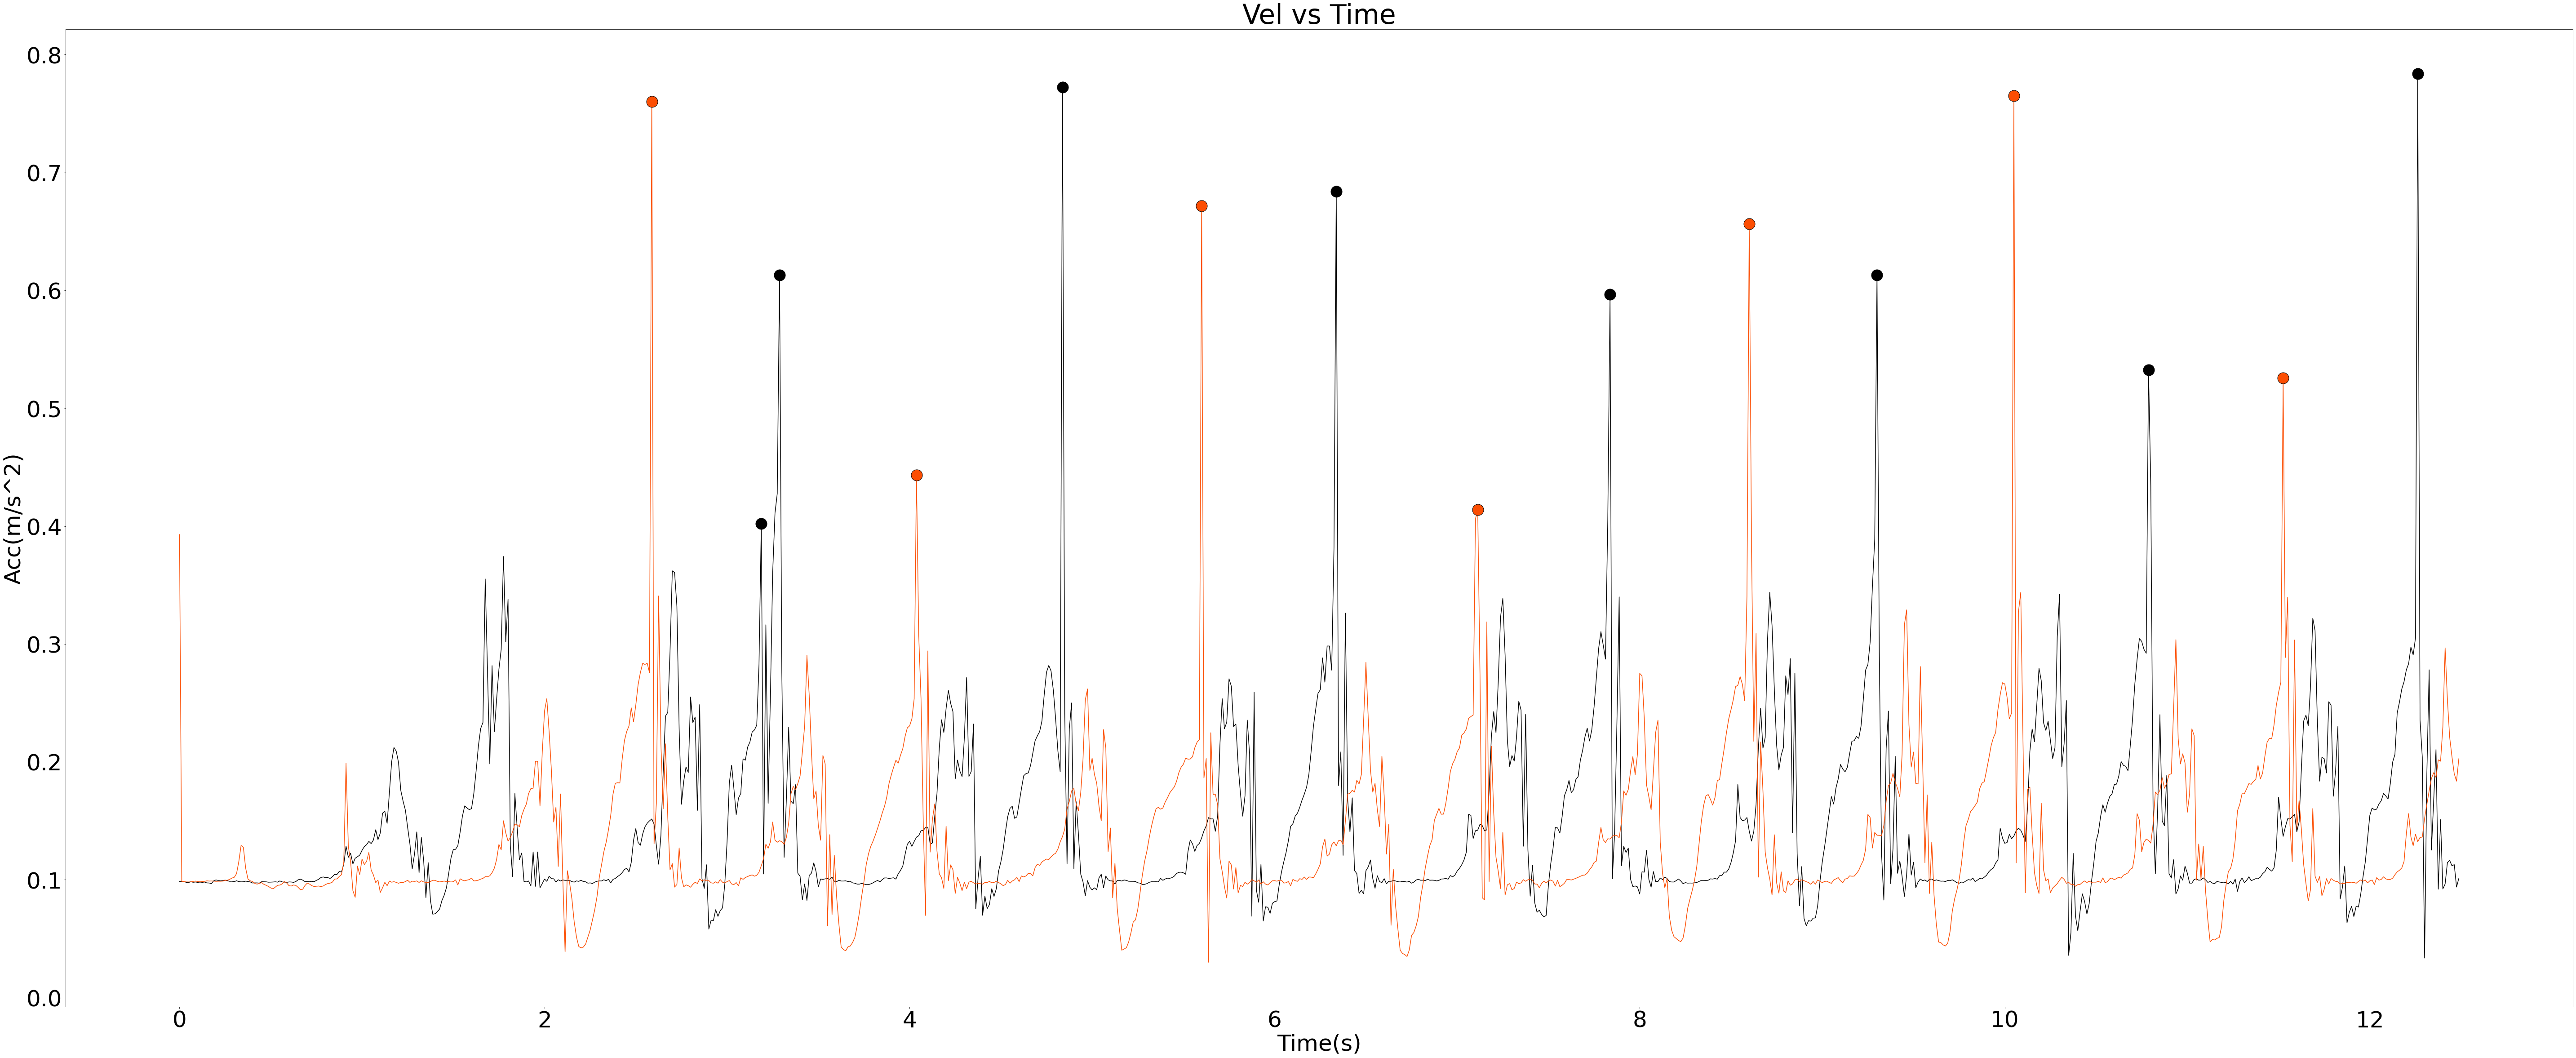

In [143]:
plt.figure(figsize=(100,40))#.set_figwidth(100)
plt.plot(t,vmag_L,label='vmag_L',color='black')
plt.plot(t,vmag_R,label='vmag_R',color='#fc4e03')
plt.plot(Left_peaks_vel,[vmag_L[i] for i in y_L], ls="", marker="o",markerfacecolor='black',markersize=25,markeredgecolor='black', label="points")
plt.plot(Right_peaks_vel,[vmag_R[i] for i in y_R], ls="", marker="o",markerfacecolor='#fc4e03',markersize=25,markeredgecolor='black', label="points")
plt.xlabel("Time(s)")
plt.ylabel("Acc(m/s^2)")
plt.title("Vel vs Time")

In [52]:
#comparing
print("Left peaks for acc:", Left_peaks_acc)
print("Left peaks for vel:", Left_peaks_vel)

Left peaks for acc: [3.2875, 4.8375, 6.3375, 7.8375, 9.3, 10.7875, 12.2625, 13.65, 13.675, 15.1125, 16.65, 18.0625, 19.4625, 20.825, 20.85, 22.2125, 23.6125]
Left peaks for vel: [3.2875, 4.8375, 6.3375, 7.8375, 9.3, 10.7875, 12.2625, 13.65, 13.675, 15.1125, 16.65, 18.0625, 19.4625, 20.825, 20.85, 22.2125, 23.6125]
